In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy as sp
import timeit
lower_receptor = 200
upper_receptor = 250
kmax = 7.1e-11
s = 4e-4 #radius of receptor in cm
a = 0.00038 #semilarge axis of cell
b = 8e-5    #semismall axis of cell
c = math.pi/np.log(2*a/b)
k2 = 2.2e-3
k3 =1.5e-3
nc = 10
e = 0.00005
max_steps = 2000
step = 0

In [2]:
def Generate_Population(num_bacteria, max_receptors):
    pop = np.zeros((num_bacteria,3))
    pop[:,0] = np.random.randint(lower_receptor,upper_receptor,(num_bacteria),dtype=np.int32)
    pop = np.split(pop,num_bacteria/1000)
    return pop


In [3]:
def Generate_Data(pop,max_steps):
    M = upper_receptor
    data = np.zeros((max_steps,M,M),dtype=np.int32)
    return data


In [4]:
def Sort_Pop(pop):
    #sorts pop based on receptor freedom
    for receptor in range(len(pop)):
        pop[receptor] = pop[receptor][np.argsort(pop[receptor][:,0])]
    return pop;

In [5]:
def Unique(pop):
    start = timeit.default_timer()
    unq = [0]*len(pop)
    counts = [0]*len(pop)
    for index in range(len(pop)):
        #print(pop[index])
        a,c = np.unique(pop[index],axis=0,return_counts=True)
        unq[index] = a
        counts[index] = c
    return unq, counts



In [6]:
def Sorting(pop):
    reactants = dict(zip(range(upper_receptor), [0]*upper_receptor)) 
    reactants['x2'] = 0
    #this dictionary is purely for the foward reaction for association
    for r in range(len(unique_subpops)):
        subpop = pop[r]
        u1,c1 = np.unique(subpop[:,0],return_counts=True)  #find the number of reactants in this subpop
        for unique in range(len(u1)):
            reactants[u1[unique]] += c1[unique]
            
        reactants['x2'] += np.sum(subpop[:,1])
    return reactants
        



The calculation of reaction constant $k_1s$ is dependent on temperature and theoretically the number of receptors on a cell:

\begin{equation}
    k_{1 \text{ } receptor} = 4D_3sc_\infty
\end{equation}

where $c_\infty$ is the total concentration of substrate, and $s$ the radius of the disk-like receptor.  The 3-dimensional diffusion constant $D_3$ is experimentally verified and calculated with the Stokes-Einstein relation:

\begin{equation}
    D_3 = \frac{k_BT}{6\pi \eta R}
\end{equation}

where $k_B$ is the boltzmann's constant, $T$ is temperature, $\eta$ is the viscosity of fluid, and $R$ the hydrodynamic radius of the phage particle head.
As N increases, the kinetic rate grows proportionally.  If N were to be so large that the entire surface of the cell was densely covered in receptors, then we can derive $k_{max}$:

\begin{equation}
    k_{max} = \frac{4\pi aD_3c_\infty}{ln(\frac{2a}{b})}
\end{equation}

Assuming that a cell can behave as an insulating ellipsoid impermeable to electric field, it would exhibit capacitance:

\begin{equation}
    C = \frac{k}{k_{max}} = \frac{sN}{sN+{\pi a}/{ln(\frac{2a}{b})}}
\end{equation}

Overall, assuming uniform distribution of $N$ receptors across the cell surface, adsorbance to the cell would be approximated with:

\begin{equation}
    k = k_{max} \bigg{(}\frac{sN}{sN + {\pi a / ln(\frac{2a}{b}})}\bigg)
\end{equation}

<div class="foo">
    
| T (C)| $k_1$ | $k_2$ | $k_3$
| ----- | --------- | ----- | ---- |
| 3 | 9.6e-11 | 4.0e-3 | 1.5e-3 |
| 4 | 3.0e-12 | 2.1e-3 | 7.9e-4 |
| 10 | 2.3e-12 | 1.2e-3 | 2.0e-4 |
| 15 | 1.6e-11 | 4.2e-3 | 1.4e-3 |
| 20 | 2.0e-11 | 8.5e-4 | 8.0e-4 |
| 24 | 1.2e-11 | 3.0e-3 | 1.2e-3 |
| 30 | 3.3e-11 | 6.2e-4 | 5.7e-4 |
| 35 | 1.5e-11 | 1.4e-3 | 1.2e-3 |
| 37 | 2.0e-11 | 2.2e-3 | 1.5e-3 |
| 40 | 1.6e-11 | 4.0e-4 | 5.1e-4 |

    
</div>

Comparison to ODE model
\begin{equation}
\\ \frac{dN_{BP}}{dt} = k_1N_BN_P-(k_2+k_3)N_{BP}
\\ \frac{dN_P}{dt} = k_2N_{BP} - k_1N_BN_P
\\ \frac{dN_B}{dt} = k_2N_{BP}-k_1N_BN_P
\\ \frac{dN^{*}_{BP}}{dt}=k_3N_{BP}
\end{equation}
$N_B$ susceptible bacteria, $N_P$ free phage, $N_{BP}$ transient bacterium-phage complexes, $N_{BP}*$ is infected cells

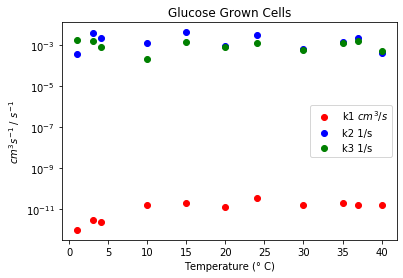

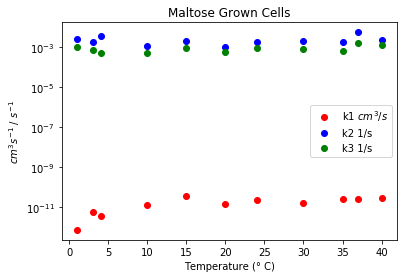

In [7]:
#data constants
import pandas as pd
import matplotlib.pyplot as plt
T = [1,3,4,10,15,20,24,30,35,37,40]
glucose_grown_k1 = [9.6e-13, 3.0e-12, 2.3e-12, 1.6e-11, 2.0e-11, 1.2e-11, 3.3e-11, 
                    1.5e-11, 2e-11,1.6e-11, 1.6e-11]
glucose_grown_k2 = [3.8e-4, 4e-3, 2.1e-3, 1.2e-3, 4.2e-3, 8.5e-4, 3e-3, 6.2e-4,
                   1.4e-3, 2.2e-3, 4.3e-4]
glucose_grown_k3 = [1.7e-3, 1.5e-3, 7.9e-4, 2.0e-4, 1.4e-3, 8.0e-4, 1.2e-3, 
                   5.7e-4, 1.2e-3, 1.5e-3, 5.1e-4]

maltose_grown_k1 = [7.4e-13, 6.0e-12, 3.6e-12, 1.3e-11, 3.5e-11, 1.4e-11, 2.2e-11, 1.6e-11,
                   2.7e-11, 2.6e-11, 2.9e-11]
maltose_grown_k2 = [2.5e-3, 1.7e-3, 3.6e-3, 1.1e-3, 2.0e-3, 9.7e-4, 1.8e-3, 1.9e-3, 1.8e-3,
                   5.4e-3, 2.3e-3]
maltose_grown_k3 = [1e-3, 7.2e-4, 5.2e-4, 4.7e-4, 8.4e-4, 5.7e-4, 8.4e-4, 7.8e-4, 6e-4, 1.5e-3, 1.2e-3]
plt.title('Glucose Grown Cells')
plt.yscale('log')
plt.xlabel('Temperature (\N{DEGREE SIGN} C)')
plt.ylabel('$cm^3s^{-1}$ / $s^{-1}$')
plt.plot(T, glucose_grown_k1, 'ro', label = 'k1 $cm^3/s$')
plt.plot(T, glucose_grown_k2, 'bo', label = 'k2 1/s')
plt.plot(T, glucose_grown_k3, 'go', label = 'k3 1/s')
plt.legend()
plt.show()

plt.title('Maltose Grown Cells')
plt.yscale('log')
plt.xlabel('Temperature (\N{DEGREE SIGN} C)')
plt.ylabel('$cm^3s^{-1}$ / $s^{-1}$')
plt.plot(T, maltose_grown_k1, 'ro', label = 'k1 $cm^3/s$')
plt.plot(T, maltose_grown_k2, 'bo', label = 'k2 1/s')
plt.plot(T, maltose_grown_k3, 'go', label = 'k3 1/s')
plt.legend()
plt.show()

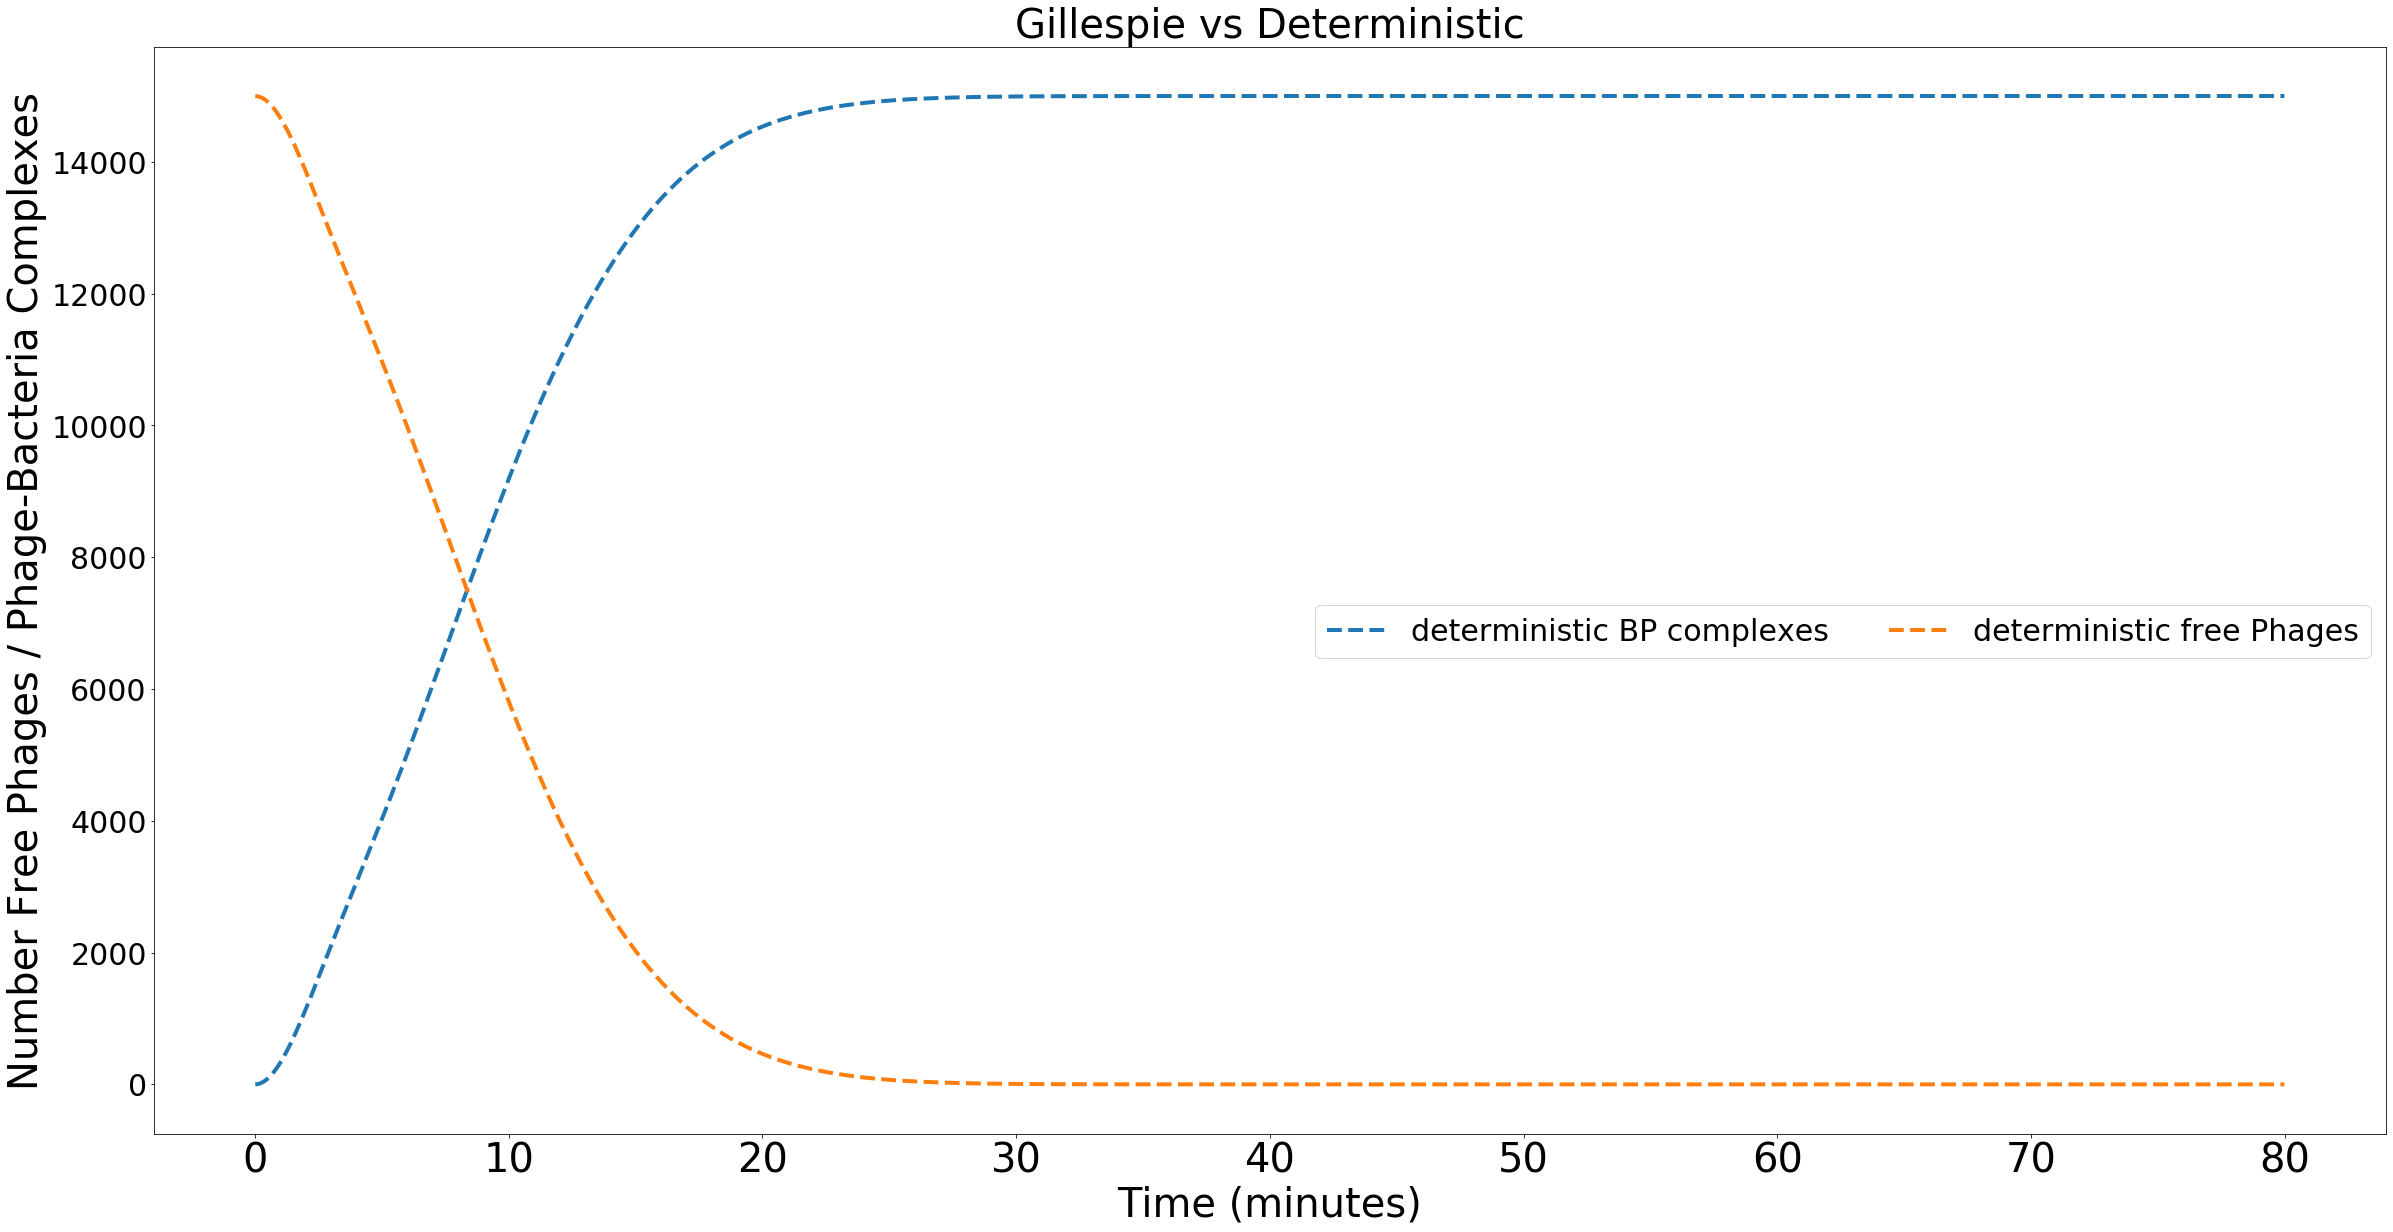

In [8]:
from scipy.integrate import odeint
def phage_kinetics(pop,t,k1,k2,k3):
    
    B = pop[0]
    P = pop[1]
    BP = pop[2]
    BP_ = pop[3]
    #print(B,P,BP,BP_)

    dBPdt = k1*B*P-(k2+k3)*BP
    dPdt = k2*BP-k1*B*P
    dBdt = k2*BP-k1*B*P
    dBP_dt = k3*BP
    #print(dBdt,dPdt,dBPdt,dBP_dt)
    return [dBdt, dPdt, dBPdt, dBP_dt];

#time points
n = 6116
t = np.linspace(0,800,n) #120 minutes divided by 6116 intervals
 
B = np.zeros(n)
P = np.zeros(n)
BP = np.zeros(n)
BP_ = np.zeros(n)
#initial conditions:
num_bacteria = int(3e+7)
num_phages = num_bacteria*5e-4
pop0 = [num_bacteria,num_phages,0,0]
k1,k2,k3 = 2.0e-11,2.2e-3,1.5e-3
for i in range(1,n):
    tspan = [t[i-1],t[i]]
    pop = odeint(phage_kinetics,pop0,t,args=(k1,k2,k3))
    pop0 = pop[i]
    B[i] = pop0[0]
    P[i] = pop0[1]
    BP[i] = pop0[2]
    BP_[i] = pop0[3]

plt.figure(figsize=[40,20])
#time points
n = 6116
t = np.linspace(0,80,n) #120 minutes divided by 6116 intervals

B = np.zeros(n)
P = np.zeros(n)
BP = np.zeros(n)
BP_ = np.zeros(n)
#initial conditions:
num_bacteria = int(3e+7)
num_phages = num_bacteria*5e-4
pop0 = [num_bacteria,num_phages,0,0]
for i in range(1,n):
    tspan = [t[i-1],t[i]]
    pop = odeint(phage_kinetics,pop0,t,args=(k1,k2,k3))
    pop0 = pop[i]
    B[i] = pop0[0]
    P[i] = pop0[1]
    
    BP[i] = pop0[2]
    BP_[i] = pop0[3]
plt.title('Gillespie vs Deterministic', fontsize=40)
plt.plot(t[1:6115],BP[1:6115]+BP_[1:6115],label = 'deterministic BP complexes',linestyle = '--',linewidth=4.0)
plt.plot(t[1:6115],P[1:6115], label = 'deterministic free Phages',linestyle = '--',linewidth = 4.0)

plt.xlabel('Time (minutes)', fontsize = 40)
plt.ylabel('Number Free Phages / Phage-Bacteria Complexes',fontsize = 40)

plt.xticks(fontsize=40)
plt.yticks(fontsize=30)
plt.legend(bbox_to_anchor=(1, .5),fontsize=30,ncol=2)


In [9]:
#calculate the k1s after being sorted
def K1_calculation():
    k1 = np.zeros((upper_receptor))  
    for i,m in enumerate(range(upper_receptor)):
        #k1[i] = kmax * (s*m) / (s*m+c) #dynamic k1
        k1[i] = 2.0e-11 #if we say k is the same for all bacteria no matter what
    return k1


    

In [10]:
def Find_Criticals(reactants,num_phages):
    criticals = []
    noncriticals = []
    for j in list(reactants.keys()):
        if reactants[j]<nc:
            if j!='x2' and num_phages<nc:
                criticals.append(j)
            if j=='x2':
                criticals.append(j)
            else:
                pass
        else:
            noncriticals.append(j)
    return criticals,noncriticals



In [11]:
def Propensity(reactants, k1):
    aj = {}
    r_keys = list(reactants.keys())
    for i,keys in enumerate(r_keys):
        if keys != 'x2':
            aj[keys] = reactants[keys]*k1[i]*num_phages
        else:
            aj[keys] = reactants[keys]*k2
            aj['x3'] = reactants[keys]*k3
    #x2 is the dissociation reaction
    #x3 is the irreversible reaction
    return aj



 \begin{equation}
        f_{jj'} \equiv \sum_{i=1}^{N}\frac{\partial a_j(x)}{\partial x_i}v_{ij'}, \quad{} j\in[1,M];j'\in J_{ncr}
    \end{equation}
    

In [12]:
def Find_Fj(aj): #partial derivatives of the propensities
    fj = {}
    p_keys = list(aj.keys())
    for i,keys in enumerate(p_keys):
        if (keys != 'x2' and keys != 'x3'):
            fj[keys] = -k1[i]*(reactants[keys]+num_phages)
        if keys == 'x2':
            fj[keys] = -k2
        if keys == 'x3':
            fj[keys] = -k3
    return fj;



\begin{equation}
        u_j(x) \equiv \sum_{j'\in J_{ncr}} f_{jj'}(x)a_{j'}(x), \quad{} j\in[1,M]
    \end{equation}
    

In [13]:
def Find_Uj(fj,aj,reactants,criticals):
    uj = {}
    f_keys = list(fj.keys())
    for i,keys in enumerate(f_keys):
        if (keys != 'x2' and keys != 'x3'):
            if keys not in criticals: #make sure we are not including critical reactions
                uj[keys] = fj[keys]*aj[keys]
        if keys == 'x2' and keys not in criticals:
            uj[keys] = fj[keys]*aj[keys]
        if keys == 'x3' and keys not in criticals:
            uj[keys] = fj[keys]*aj[keys]
    return uj



\begin{equation}
        \sigma^2_j(x) \equiv \sum_{j' \in J_{ncr}} f^2_{jj'} a_{j'}(x) \quad{} j \in [1,M];
\end{equation}

In [14]:
def Find_Sj(fj,aj,reactants,criticals):
    sj = {}
    s_keys = list(fj.keys())
    for i,keys in enumerate(s_keys):
        if (keys != 'x2' and keys != 'x3'):
            if keys not in criticals: #make sure we are not including critical reactions
                sj[keys] = np.power(fj[keys],2) * aj[keys]
        if keys == 'x2' and keys not in criticals:
            sj[keys] = np.power(fj[keys],2) * aj[keys]
        if keys == 'x3' and keys not in criticals:
            sj[keys] = np.power(fj[keys],2) * aj[keys]
    return sj


In [15]:
def Find_Tau1(uj,sj,aj,criticals,noncriticals):
    #find the total sum of all propensities
    right = []
    left = []
    total_prop = np.sum(list(aj.values()))
         
    uj_keys = list(uj.keys()) #noncritical anyways
    sj_keys = list(sj.keys()) #noncritical anyways
    u_ = 0
    s_ = 0
    t_keys = uj_keys
    for key in uj_keys:
        if key != 'x2' or key != 'x3':
            left.append(e*total_prop/abs(uj[key]))
            right.append(np.power((e*total_prop),2)/sj[key])
        else:
            break;
    
    if 'x2' in uj_keys:
        right.append((e*total_prop)/sj['x2'])
        left.append(np.power(e*total_prop,2)/abs(uj['x2']))
    if 'x3' in sj_keys:
        left.append(np.power((e*total_prop),2)/abs(uj['x3']))
        right.append(np.power(e*total_prop,2)/sj['x3'])
    else:
        pass
    #print('THE LEFT AND RIGHT MIN CALCULATIONS')
    left = np.array(left)
    right = np.array(right)
    left[np.where(left == np.inf)[0]] = np.nan
    right[np.where(right == np.inf)[0]] = np.nan
    #print(left,right)
    tau1 = np.nanmin([np.nanmin(right),np.nanmin(left)])
    #tau1 in unit of seconds
    
    return tau1

    
    

In [16]:
def Find_Tau2(aj,criticals):
    critical_sum = 0
    for j in criticals:
        critical_sum += aj[j]
    if critical_sum != 0:
        tau2 = np.random.exponential(1/critical_sum)
    else:
        tau2 = np.nan

    if tau2 == np.inf or tau2 == -np.inf:
        tau2 = np.nan
    
    return tau2;
    


In [17]:
def Best_Tau(tau1,tau2):
    tau = np.nanmin(tau1,tau2)
    return tau



In [18]:
#the last two indices of Rj are the dissociation and 
#irrev binding respectively
def Find_Rj_No_Criticals(aj,tau,noncriticals):   
    aj_keys = list(aj.keys())
    #Rj = np.zeros((len(aj_keys)))
    Rj = {}
    for keys in aj_keys:
        Rj[keys] = np.random.poisson(aj[keys]*tau)
    return Rj
     
        
def Find_Rj_Criticals(aj,tau,criticals,noncriticals):
    Rj = {}
    aj_keys = list(aj.keys())
    for keys in aj_keys:
        if keys not in criticals:
            Rj[keys] = np.random.poisson(aj[keys]*tau)
        else:  #criticals are set to 0 
            Rj[keys] = 0
            
    #find a single critical reaction to fire exactly once
    point_probabilities = np.zeros((len(criticals))) 
    critical_sum = 0
    for i in criticals:
        critical_sum += aj[i]
    for i in range(len(criticals)):
        point_probabilities[i] = aj[i]/critical_sum
        
    point_probabilities = point_probabilities/np.sum(point_probabilities)
    chosen_critical = np.random.choice(criticals,p=point_probabilities)
    Rj[chosen_critical] = 1      
    return Rj

 


In [19]:
def Direct_SSA(pop,num_phages):
    v1 = np.array([-1,1,0])
    v2 = np.array([+1,-1,0])
    v3 = np.array([0,-1,1])
    t = 0
    for iteration in range(100): #evolve 100 times
        success = False
        print('DIRECT SSA ITERATION: {}'.format(iteration))
        #unique_subpops, counts_subpops = Unique(pop)
        reactants = Sorting(pop)
        aj = Propensity(reactants,k1)
        propensities = list(aj.values())
        total_sum_prop = np.sum(propensities)
        tau = (1/total_sum_prop)*np.log(1/np.random.uniform())
        #tau = np.random.exponential(1/total_sum_prop)
        upper_limit = np.random.uniform()*total_sum_prop #issue with upper limit condition
        r_keys = list(reactants.keys())
        
        probs = np.array(propensities)/np.sum(propensities)
        probs = probs/np.sum(probs)
        
        j = np.random.choice(list(aj.keys()),p = probs)
        if j == 'x2':
            print(v2)
            #dissociation
            while(success == False):
                sb = np.random.randint(0,len(pop))
                subpop = pop[sb]
                to_reverse = np.where(subpop[:,1]>0)[0] #just change the first index where it occurs
                if len(to_reverse) != 0:
                    to_reverse = np.random.choice(to_reverse)
                    print(subpop[to_reverse])
                    subpop[to_reverse] += v2
                    print(subpop[to_reverse])
                    pop[sb] = subpop
                    num_phages += 1
                    success = True
                    break;
                else:
                    pass;
        if j == 'x3':
            print(v3)
            #irreversible binding
            while(success == False):
                sb = np.random.randint(0,len(pop))
                subpop = pop[sb]
                to_perm = np.where(subpop[:,1]>0)[0] #just change the first index where it occurs
                if len(to_perm) != 0:
                    to_perm = np.random.choice(to_perm)
                    print(subpop[to_perm])
                    subpop[to_perm] += v3
                    print(subpop[to_perm])
                    pop[sb] = subpop
                    success = True
                    break;
        else:
            #one of the reversible bindings
            print(v1)
            while(success == False):
                sb = np.random.randint(0,len(pop))
                subpop = pop[sb]
                to_associate = np.where(subpop[:,0]>0)[0]
                if len(to_associate) != 0:
                    to_associate = np.random.choice(to_associate)
                    print(subpop[to_associate])
                    subpop[to_associate] += v1
                    print(subpop[to_associate])
                    pop[sb] = subpop
                    num_phages -= 1
                    success = True
                    break;
        
        
        t+=tau
        print('TIME: {}'.format(t))
    print('Number of Phages after SSA: {}'.format(num_phages))
            
    return pop,num_phages,t
            
        
        
    

In [20]:
#now we need to go back and mutate
#distribute the poisson generated mutations to all the valid bacteria
#respectively 
#Hopefully, Rjs never get too big so that this disgusting nest of loops becomes too expensive
def Evolution(pop,Rj,num_phages):
    v1 = np.array([-1,+1,0])
    v2 = np.array([+1,-1,0])
    v3 = np.array([0,-1,+1])
    #predict how many cycles we will go through based on Rj
    fires = int(np.sum(list(Rj.values())))
    cycles = np.random.randint(0,len(pop),fires) #randomly choose the subpop to distribute to
    for rxn in list(Rj.keys()): #352
        if Rj[rxn] != 0:
            for pop_index in cycles:
                subpop = pop[pop_index]             #10000
                if rxn not in ['x2','x3']:
                    #distribute throughout subpops
                    indices = np.where(pop[pop_index][:,0]==rxn)[0]
                    i=0
                    if len(indices)!=0:
                        while(Rj[rxn]>0):
                            #print(subpop[indices[i]])
                            subpop[indices[i]]+=v1
                            #print(subpop[indices[i]])
                            num_phages -= 1
                            Rj[rxn] -= 1
                            i+=1
                            if i>len(indices)-1:
                                break;
                    else:
                        pass;
                if rxn == 'x2':
                    #this is a dissociation reaction
                    indices = np.where(pop[pop_index][:,1]>0)[0]
                    #print('dissociate rxn')
                    #print(indices)
                    i = 0
                    if len(indices)!=0:
                        while(Rj[rxn]>0):
                            #print(Rj[rxn])
                            #print(subpop[indices[i]])
                            subpop[indices[i]]+=v2
                            #print(subpop[indices[i]])
                            num_phages += 1
                            Rj[rxn] -= 1
                            i+=1
                            if i>len(indices)-1:
                                break;
                if rxn == 'x3':
                    indices = np.where(pop[pop_index][:,1]>0)[0]
                    i = 0
                    #print('irrev binding')
                    #print(indices)
                    if len(indices)!=0:
                        while(Rj[rxn]>0):
                            #print(Rj[rxn])
                            #print(subpop[indices[i]])
                            subpop[indices[i]]+=v3
                            #print(subpop[indices[i]])
                            Rj[rxn] -= 1
                            i+=1
                            if i>len(indices)-1:
                                break;
                pop[pop_index] = subpop
    return pop,num_phages;

                       

In [21]:
def Update_Data(pop):
    d = np.zeros((upper_receptor,upper_receptor),dtype = np.int32)
    for subpop in pop:
        u,c = np.unique(subpop[:,1:3],axis=0,return_counts=True)
        for d_index in range(len(c)):  
            a = int(u[d_index][0])
            b = int(u[d_index][1])
            d[a][b] += int(c[d_index])
    return d;
        

In [22]:
k1 = K1_calculation()
num_bacteria = int(3e+7)
num_phages = num_bacteria*5e-4
pop = Generate_Population(num_bacteria,upper_receptor)
pop = Sort_Pop(pop) #may not be necessary?  I think it speeds up the np.unique function
data = Generate_Data(pop,max_steps)
t=0
time = np.zeros((max_steps))

In [ ]:
while(step<max_steps):
    unique_subpops, counts_subpops = Unique(pop)
    start = timeit.default_timer()        
    reactants = Sorting(pop)
    print('TOTAL NUMBER OF REACTANTS: {}'.format(np.sum(list(reactants.values()))))
    criticals, noncriticals = Find_Criticals(reactants,num_phages)
    if step > 1:
        e = 0.03
    if len(criticals)!=0:
        print('============CRITICAL REACTIONS DETECTED==============')
        print('=========Number of Criticals Detected: {}==========='.format(len(criticals)))
        print('CRITICAL REACTION INDICES: {}'.format(criticals))
    print('REACTANTS \n: {}'.format(reactants))
    aj = Propensity(reactants,k1)
    #print('PROPENSITIES \n{}'.format(aj))
    fj = Find_Fj(aj)
    uj = Find_Uj(fj,aj,reactants,criticals)
    sj = Find_Sj(fj,aj,reactants,criticals)
    tau1 = Find_Tau1(uj,sj,aj,criticals,noncriticals)
    tau2 = Find_Tau2(aj,criticals)
    print('tau1: {} vs tau2: {}'.format(tau1,tau2))
    tau = np.nanmin([tau1,tau2])
    tot_sum_prop = np.sum(list(aj.values()))
    print('TOTAL PROPENSITY: {}'.format(tot_sum_prop))
    if (tau<0.001*tot_sum_prop  or len(noncriticals)==0):
        print('---===ENGAGE DIRECT SSA===---')
        pop,num_phages,tau = Direct_SSA(pop,num_phages)
        
    elif tau == tau1:
        Rj = Find_Rj_No_Criticals(aj,tau,noncriticals) 
        print('noncritical poisson')
        #print('RJ: \n{}'.format(Rj))
        print('total sum prop: {}'.format(tot_sum_prop))

    elif tau == tau2:
        Find_Rj_Criticals(aj,tau,criticals,noncriticals)
        print('CRITICAL REACTIONS POISSON')
        
    pop,num_phages = Evolution(pop,Rj,num_phages)
        
    t+=tau
    d = Update_Data(pop)
    print('DATA: \n{}'.format(d.astype(int)))
    data[step] = d
    time[step] = t
    step+=1
    print('change in time: {} (s)'.format(tau))
    print('time t: {} (s)'.format(t))
    print('time t: {} (min)'.format(t/60))
    print('Free Phages Left (algorithmic): {}'.format(num_phages))
    




TOTAL NUMBER OF REACTANTS: 30000000.0
============CRITICAL REACTIONS DETECTED==============
=========Number of Criticals Detected: 1===========
CRITICAL REACTION INDICES: ['x2']
REACTANTS 
: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in double_scalars
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


DATA: 
[[29998155        0        0 ...        0        0        0]
 [    1845        0        0 ...        0        0        0]
 [       0        0        0 ...        0        0        0]
 ...
 [       0        0        0 ...        0        0        0]
 [       0        0        0 ...        0        0        0]
 [       0        0        0 ...        0        0        0]]
change in time: 202.27645407638767 (s)
time t: 202.27645407638767 (s)
time t: 3.371274234606461 (min)
Free Phages Left (algorithmic): 13155.0
TOTAL NUMBER OF REACTANTS: 30001845.0
REACTANTS 
: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: